In [24]:
import pandas as pd
import numpy as np

In [6]:
games_df = pd.read_csv('boardgames_dataset.csv', sep = ';') #why not use comma?

# Basic Stuff
First I'll take a look at the basic shape of the dataset. How many columns, how many entries, data types and missing values

In [10]:
# Taking a look at the shape
# 20k rows and 14 columns
games_df

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
0,Gloomhaven,2017,1,1,4,60,120,12,31254,8.85292,1.59819,3.8078,1311,5972,['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Campaign Games', 'Components: Miniatures', '..."
1,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,34729,8.62499,1.59463,2.8301,971,5477,['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Campaign Games', 'Legacy', 'Pandemic']"
2,Terraforming Mars,2016,3,1,5,120,120,12,48339,8.42299,1.36938,3.2313,1863,7274,['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['Fryxgames Future Timeline', 'Planets: Mars',..."
3,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,18269,8.49419,1.49542,4.3850,891,2660,['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Tableau Building', 'Through the Ages']"
4,Brass Birmingham,2018,5,2,4,60,120,14,10070,8.62031,1.22876,3.9122,467,1702,['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Beer', 'Brass', 'Cities: Birmingham (England..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Franchise,1990,19996,2,8,90,90,0,3,6.00000,2.94392,0.0000,0,2,['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']",['Sports: Baseball']
19996,Punto y Raya,1988,19997,2,2,20,20,0,1,4.00000,0.00000,0.0000,0,2,['None'],['Abstract Strategy'],['Enclosure'],['Dots and Boxes']
19997,3 Up,1972,19998,2,4,20,20,5,1,6.00000,0.00000,0.0000,0,4,['None'],"['Abstract Strategy', 'Childrens Game']",['Pattern Building'],"['Airfix edition', 'Lakeside edition', 'Wexler..."
19998,Dino-Checkers,1989,19999,2,2,30,30,6,20,5.77500,1.76405,0.0000,0,13,['None'],"['Abstract Strategy', 'Childrens Game']",['Area Majority / Influence'],['Animals: Dinosaurs']


In [12]:
games_df.dtypes #All dtypes seem ok (no conversion needed)

name                  object
yearpublished          int64
sortindex              int64
minplayers             int64
maxplayers             int64
minplaytime            int64
maxplaytime            int64
minage                 int64
usersrated             int64
average              float64
stddev               float64
avgweight            float64
numweights             int64
numcomments            int64
boardgamehonor        object
boardgamecategory     object
boardgamemechanic     object
boardgamefamily       object
dtype: object

In [15]:
games_df.isna().sum() # No missing values. Noice.

name                 0
yearpublished        0
sortindex            0
minplayers           0
maxplayers           0
minplaytime          0
maxplaytime          0
minage               0
usersrated           0
average              0
stddev               0
avgweight            0
numweights           0
numcomments          0
boardgamehonor       0
boardgamecategory    0
boardgamemechanic    0
boardgamefamily      0
dtype: int64

# Checking Variables by themselves
Now I want to look at each variable individually and check their distributions

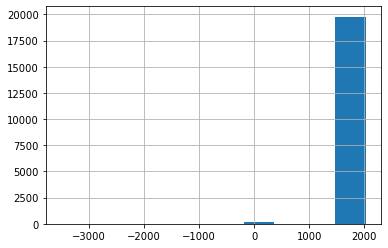

In [19]:
#year plublished
games_df['yearpublished'].hist()

Whe have a few games that the year published is very low. We can investigate further and verify that those are just really old games:

https://en.wikipedia.org/wiki/Senet
https://en.wikipedia.org/wiki/Xiangqi

For these games, we can also see that the year plublished is an estimate. Senet was hardly published precisely on 3500 B.C.


In [23]:
games_df.loc[games_df['yearpublished'] < 1000].sort_values(by= 'yearpublished')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
6826,Senet,-3500,6827,2,2,30,30,6,592,5.89218,1.63069,1.4833,60,285,['None'],"['Abstract Strategy', 'Dice', 'Religious']","['Dice Rolling', 'Roll / Spin and Move']","['Continent: Africa', 'Country: Egypt', 'Gammon']"
1222,Backgammon,-3000,1223,2,2,30,30,8,10704,6.52852,1.59917,2.0183,876,2835,['None'],"['Abstract Strategy', 'Dice']","['Betting and Bluffing', 'Dice Rolling', 'Roll...","['3M Bookshelf Series', 'Characters: Austin Po..."
19512,Mehen,-3000,19513,2,6,20,20,5,13,5.57692,1.70797,1.0000,1,11,['None'],"['Abstract Strategy', 'Racing']","['Dice Rolling', 'Roll / Spin and Move']",['Ancient Board Games']
18288,Marbles,-3000,18289,0,0,10,10,4,417,4.67789,1.72737,1.1064,47,150,['None'],"['Action / Dexterity', 'Childrens Game', 'Game...","['Action / Dexterity', 'Childrens Game', 'Game...","['Finger Flicking Games', 'Marble Games']"
152,Go,-2200,153,2,2,30,180,8,13752,7.63465,1.91180,3.9956,1353,3514,['None'],['Abstract Strategy'],['Enclosure'],"['3M Bookshelf Series', 'Combinatorial', 'Go',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,Mia,600,10195,2,12,20,20,8,104,6.15096,1.73044,1.1818,11,37,['None'],"['Bluffing', 'Dice']","['Betting and Bluffing', 'Dice Rolling']",['Dice cup bluffing games']
12775,Chaturanga,650,12776,2,4,30,30,8,93,5.93387,1.27079,2.2500,16,55,['None'],['Abstract Strategy'],"['Dice Rolling', 'Grid Movement', 'Player Elim...",['Chess Games']
3731,Kalah,700,3732,2,2,10,10,5,5375,5.88713,1.41687,1.6348,408,1504,['None'],['Abstract Strategy'],['Mancala'],"['Mancala', 'Combinatorial', 'Continent: Afric..."
5987,Go-Moku,700,5988,2,2,5,5,8,510,6.00296,1.73093,1.9038,52,180,['None'],['Abstract Strategy'],['Pattern Building'],"['Combinatorial', 'Go', 'n in a row', 'Ravensb..."


In [25]:
# Lets evaluate by century
games_df['century'] = np.floor(games_df['yearpublished']/100)

# We are not going to be super strict with century nomenclature
# For our dataset years 99 B.C to 99 A.D are going to be century zero. 1900 to 1999 are century 19
# This is wrong according to strict historic nomenclature 

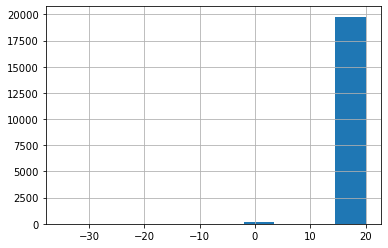

In [26]:
games_df['century'].hist()

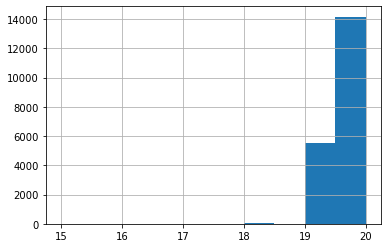

In [28]:
games_df.loc[games_df['century'] >= 15, 'century'].hist()

In [30]:
# Unpublished Prototype; Traditional Card Games? Seems like these dats are actually probably unknown
games_df.loc[games_df['century'] == 0]

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,century
1415,Pichenotte,0,1416,2,4,60,60,6,1478,7.00738,1.50184,1.4833,120,401,['None'],['Action / Dexterity'],"['Flicking', 'Team-Based Game']","['Carrom games', 'Finger Flicking Games']",0.0
2570,Unpublished Prototype,0,2571,0,0,0,0,0,705,6.93858,2.46193,2.4667,75,1013,['None'],['(Unpublished)'],['(Unpublished)'],"['Admin: Miscellaneous Placeholder', 'Admin: U...",0.0
2788,Traditional Card Games,0,2789,0,0,0,0,0,813,6.59868,1.68549,1.9683,63,373,['None'],"['Card Game', 'Game System']","['Card Game', 'Game System']","['Admin: Miscellaneous Placeholder', 'Traditio...",0.0
3070,Riichi Mahjong,0,3071,4,4,60,120,8,231,8.36385,1.69289,3.0000,15,54,['None'],['Abstract Strategy'],"['Betting and Bluffing', 'Hand Management', 'S...",['Mahjong'],0.0
3121,Outside the Scope of BGG,0,3122,0,0,0,0,0,547,6.72534,2.18702,1.6582,79,1360,['None'],['(Unknown)'],['(Unknown)'],"['Admin: Miscellaneous Placeholder', 'Admin: O...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19821,Mysteries by Vincent Women Only \u2013 High T...,0,19822,8,8,180,180,18,0,0.00000,0.00000,0.0000,0,0,['None'],"['Deduction', 'Murder/Mystery']",['Role Playing'],['Mysteries by Vincent'],0.0
19822,The Daisy Diamond Detective Series Episode #1...,0,19823,8,8,180,180,10,0,0.00000,0.00000,0.0000,0,0,['None'],"['Deduction', 'Murder/Mystery']",['Role Playing'],['Mysteries by Vincent'],0.0
19824,The Daisy Diamond Detective Series Episode #3...,0,19825,8,8,180,180,10,0,0.00000,0.00000,0.0000,0,0,['None'],"['Deduction', 'Murder/Mystery']",['Role Playing'],['Mysteries by Vincent'],0.0
19898,Equate Advanced Tile Set,0,19899,2,4,120,120,0,14,6.35000,1.31570,2.0000,2,9,['None'],"['Educational', 'Expansion for Base-game', 'Ma...",['Tile Placement'],['Equate'],0.0


Only by looking at they year published, I could pick up a few things:

- Most games were published on centuries 19 and 20
- There are about 200 games on century 0. It seems like these are actually games with unkown publishing dates
- My suspicion is that this dataset originally had missing values, but someone replaced missing values with zeroes
- If I'm correct, them we gotta watch out for zeroes in other columns as well (may be missing values)
- Also it's probably going to be a pain in the ass to differentiate between missing values zeroes and true zeroes
- There are some millenia old games as well. In those cases, the year of publishing are estimates and are less meaningfull
- I also noticed looking over the dataset that oriental games enconding problem. Not sure if this is a real problem tough.

A good suggestion to progress with the analisys is to separate modern games from ancient ones and analyze them seperatly as we..